In [1]:
from duckduckgo_search import ddg_images
from fastbook import download_images, search_images_ddg, resize_images
from fastcore.all import*
import os

from fastbook import *

from fastai.vision.widgets import *

In [4]:
searches ='dog','cat','horse','lion','tiger','snake','capybara','bear', 'wolf','koala'
#
path = Path('Ten_Different_Animals')
from time import sleep

for o in searches:
    print("Searching:",o)
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo',30))
    resize_images(path/o, max_size=400, dest=path/o)

Searching: wolf
Searching: koala


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [11]:
path = Path('Ten_Different_Animals')

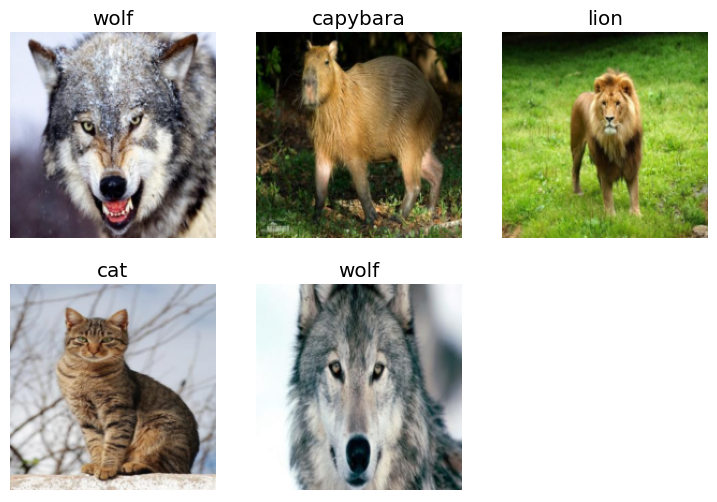

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=5)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


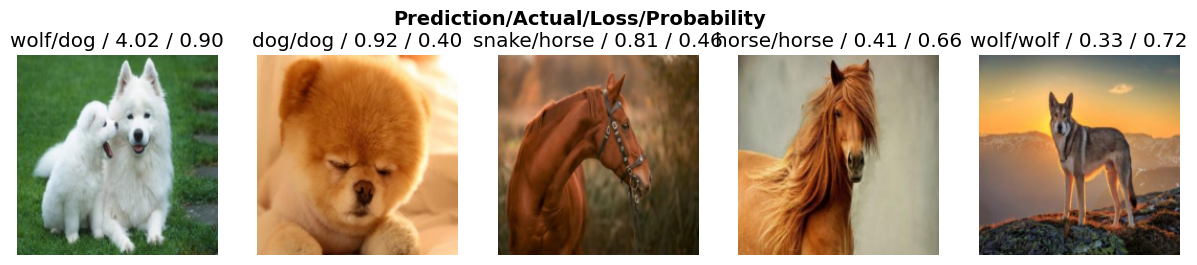

In [15]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1)

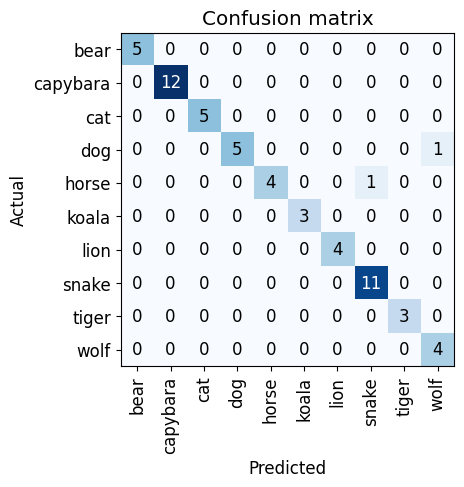

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [18]:
# import shutil


# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Error: Destination path 'Ten_Different_Animals\horse\d06efa51-5cd1-4d79-9bcc-d57995a9c193.jpg' already exists